<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Sex
male,577
female,314


,Pclass
3,491
1,216
2,184


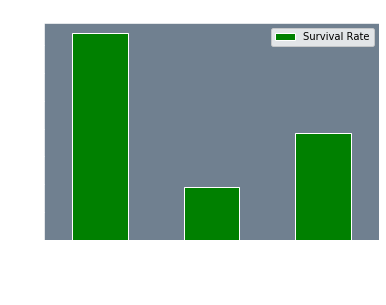

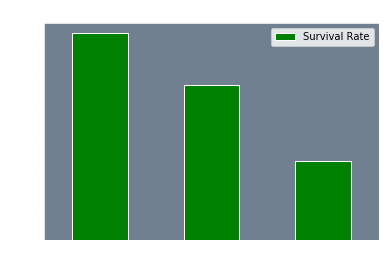

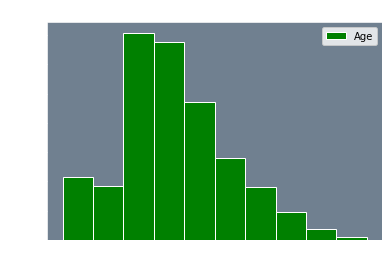

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
TitanicTrain = pd.read_csv('C:\\Users\\conno\\Documents\\NW SPS Masters\\MSDS 422 - Practical Maching Learning\\train.csv')
TitanicTrain.info()
display(TitanicTrain.describe())
display(TitanicTrain.head())

display(pd.DataFrame(TitanicTrain['Sex'].value_counts()))
display(pd.DataFrame(TitanicTrain['Pclass'].value_counts()))




fate_gender = TitanicTrain[['PassengerId','Sex','Survived']].groupby(['Sex','Survived']).count()
fate_class = TitanicTrain[['PassengerId','Pclass','Survived']].groupby(['Pclass','Survived']).count()
fate_age = TitanicTrain[['Age','Survived']].groupby(['Survived']).mean()
survival_rates = {'Sex':["Female","Male","Total"], 
                  'Survival Rate':[fate_gender['PassengerId'][1]/(fate_gender['PassengerId'][0]+fate_gender['PassengerId'][1]),fate_gender['PassengerId'][3]/(fate_gender['PassengerId'][3]+fate_gender['PassengerId'][2]),
                                  (fate_gender['PassengerId'][3]+ fate_gender['PassengerId'][1])/(fate_gender['PassengerId'][0]+fate_gender['PassengerId'][1]+fate_gender['PassengerId'][2]+fate_gender['PassengerId'][3])]}
survival_rates = pd.DataFrame(survival_rates)
survival_rates.set_index('Sex', drop = True, inplace = True)
ax = survival_rates.plot(kind='bar', facecolor = 'green', color = 'w', edgecolor = 'w')
ax.set_title("Survival Rates by Gender", color = 'w')
ax.set_ylabel("Survival Rate", color = 'w')
ax.set_facecolor('slategrey')
ax.tick_params(axis = 'x',colors = 'w')
ax.tick_params(axis = 'y',colors = 'w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('w')
ax.spines['right'].set_color('w')
ax.spines['bottom'].set_color('w')
ax.xaxis.label.set(color = 'w')


survival_rates2 = {'Class':[1,2,3],'Survival Rate':[fate_class['PassengerId'][1,1] / (fate_class['PassengerId'][1,0] + fate_class['PassengerId'][1,1] ),
fate_class['PassengerId'][2,1] / (fate_class['PassengerId'][2,0] + fate_class['PassengerId'][2,1] ),
fate_class['PassengerId'][3,1] / (fate_class['PassengerId'][3,0] + fate_class['PassengerId'][3,1] )]}
survival_rates2 = pd.DataFrame(survival_rates2)
survival_rates2.set_index('Class',drop = True, inplace = True)
ax = survival_rates2.plot(kind='bar', facecolor = 'green', color = 'w', edgecolor = 'w')
ax.set_title("Survival Rates by Class", color = 'w')
ax.set_ylabel("Survival Rate", color = 'w')
ax.set_facecolor('slategrey')
ax.tick_params(axis = 'x',colors = 'w')
ax.tick_params(axis = 'y',colors = 'w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('w')
ax.spines['right'].set_color('w')
ax.spines['bottom'].set_color('w')
ax.xaxis.label.set(color = 'w')


age =  pd.DataFrame(TitanicTrain['Age'])
ax = age.plot(kind='hist', facecolor = 'green', color = 'w', edgecolor = 'w')
ax.set_title("Age Hist", color = 'w')
ax.set_ylabel("Age", color = 'w')
ax.set_facecolor('slategrey')
ax.tick_params(axis = 'x',colors = 'w')
ax.tick_params(axis = 'y',colors = 'w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('w')
ax.spines['right'].set_color('w')
ax.spines['bottom'].set_color('w')
ax.xaxis.label.set(color = 'w')






